# Preprocessing

In [18]:
import pandas as pd
import numpy as np


In [3]:
restaurant_df=pd.read_csv('restaurants1.csv')
review_df=pd.read_csv('reviews1.csv')

In [6]:
print(restaurant_df.shape)

(500, 17)


In [23]:
len(restaurant_df['reviews'])!=0

True

In [42]:
restaurant_df=restaurant_df[(restaurant_df['reviews'].apply(lambda x: x !='[]' ))]

In [44]:
restaurant_df.shape

(486, 17)

In [55]:
np.size(restaurant_df['id'].unique())

476

In [56]:
# Supprimer les doublons basés sur 'review_id' s'ils existent
restaurant_df.drop_duplicates(subset='id', inplace=True)

C:\Users\rosel\AppData\Local\Temp\ipykernel_79940\2003988522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df.drop_duplicates(subset='id', inplace=True)


In [58]:
restaurant_df.shape

(476, 17)

In [46]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son in-law & his m...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w


In [60]:
# Supprimer les doublons basés sur 'review_id' s'ils existent
review_df.drop_duplicates(subset='review_id', inplace=True)

In [61]:
review_df.shape

(1393, 6)

In [47]:
review_df['text'] = review_df['text'].str.replace(r"[^a-zA-Z0-9\s.,;']", "", regex=True)

In [48]:
# Supprimer les espaces blancs superflus
review_df['text'] = review_df['text'].str.strip()

In [62]:
# Par exemple, nous pourrions vouloir s'assurer que les ID sont des chaînes de caractères et non des nombres
review_df['business_id'] = review_df['business_id'].astype(str)
review_df['review_id'] = review_df['review_id'].astype(str)

In [65]:
review_df.isna().sum()

business_id     0
review_id       0
text            0
rating          0
time_created    0
user_id         0
dtype: int64

### Correction grammatical et langue

In [68]:
!pip install transformers -U 

     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     --------------------------------- ---- 112.6/126.8 kB 2.2 MB/s eta 0:00:01
     ------------------------------------ - 122.9/126.8 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 126.8/126.8 kB 1.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tokenizers to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.2 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.2 MB 1.5 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.2 MB 1.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/8.2 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.2 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.2 MB 2.4 MB/s eta 0:00:04
   ---- -------

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Python311\\Scripts\\huggingface-cli.exe' -> 'C:\\Python311\\Scripts\\huggingface-cli.exe.deleteme'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("vennify/t5-base-grammar-correction")
model = AutoModelForSeq2SeqLM.from_pretrained("vennify/t5-base-grammar-correction")

C:\Users\rosel\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rosel\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [70]:
def correct_grammar(text, tokenizer, model):
    # Ajouter le préfixe requis par T5 pour la tâche de correction grammaticale
    input_text = f"grammar: {text}"

    # Encoder le texte et générer la correction
    inputs = tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)

    # Décoder et retourner la correction
    corrected_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return corrected_text

# Exemple d'utilisation
input_sentence = "She don't know what to do."
corrected_sentence = correct_grammar(input_sentence, tokenizer, model)
print(f"Original: {input_sentence}\nCorrected: {corrected_sentence}")

Original: She don't know what to do.
Corrected: She doesn't know what to do.


In [71]:
# Appliquer la fonction de correction à chaque avis
review_df['corrected_text'] = review_df['text'].apply(lambda x: correct_grammar(x, tokenizer, model))

In [72]:
review_df[['text', 'corrected_text']].head(10)

,text,corrected_text
0,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a..."
1,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...
2,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you..."
3,"Came here with my daughter, son inlaw his mom...","Came here with my daughter, son in law, his mo..."
4,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...
5,"The food was AMAZING, I had the vegetarian veg...","The food was AMAZING, I had the vegetarian veg..."
6,I'm staying in the area and was sitting at a c...,I'm staying in the area and was sitting at a c...
7,I can't help but share my incredible experienc...,I can't help but share my incredible experienc...
8,This is an amazing bar style restaurant. The s...,This is an amazing bar style restaurant. The s...
9,"I understand that everyone wants to see food, ...","I understand that everyone wants to see food, ..."


In [74]:
! pip install langdetect transformers


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
review_df.to_csv("reviews.csv", sep=';', index=False)

In [75]:
from langdetect import detect
from transformers import MarianMTModel, MarianTokenizer

def detect_and_translate(text, tokenizer, model):
    # Détection de la langue
    try:
        lang = detect(text)
    except:
        lang = "error"  # en cas d'erreur dans la détection

    # Traduire en anglais si la langue n'est pas l'anglais
    if lang != 'en' and lang != "error":
        # Préparer le texte pour la traduction
        inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True)
        outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)
        text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Charger le tokenizer et le modèle de traduction 
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-es-en")

# Appliquer la fonction à chaque avis
review_df['translated_text'] = review_df['text'].apply(lambda x: detect_and_translate(x, tokenizer, model))

# Afficher les résultats
print(review_df[['text', 'translated_text']].head())

c:\Python311\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


                                                text  \
0  Based on the menu presented, one could write a...   
1  I like this place but it does feel a little bi...   
2  If you love French OnIon Soup, this is for you...   
3  Came here with my daughter, son inlaw  his mom...   
4  This tiny eatery along the Seine on the left b...   

                                     translated_text  
0  Based on the menu presented, one could write a...  
1  I like this place but it does feel a little bi...  
2  If you love French OnIon Soup, this is for you...  
3  Came here with my daughter, son inlaw  his mom...  
4  This tiny eatery along the Seine on the left b...  


In [76]:
review_df.to_csv("reviews_fin.csv", sep=';', index=False)

### Sentiment analysis des avis en moyenne

In [77]:
pip install vaderSentiment


     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
# Initialisation de VADER
analyzer = SentimentIntensityAnalyzer()

# Fonction pour obtenir le sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Application de la fonction à chaque avis
review_df['sentiment'] = review_df['corrected_text'].apply(get_sentiment)

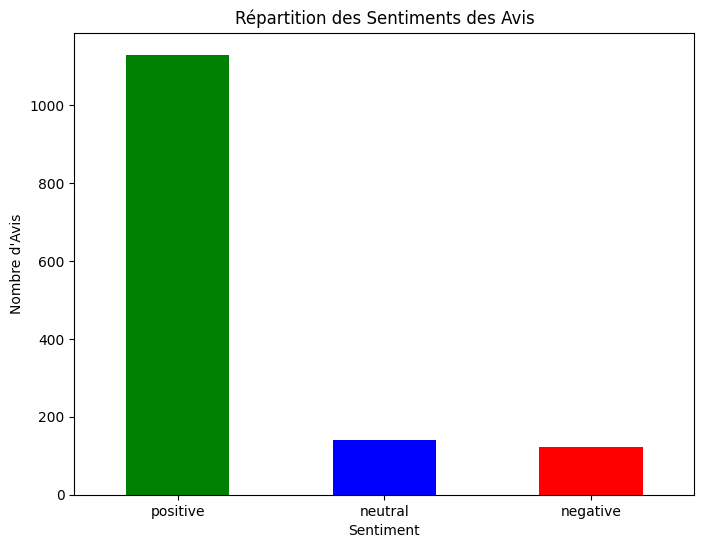

In [82]:
# Compter les sentiments
sentiment_counts = review_df['sentiment'].value_counts()

# Création d'un diagramme à barres
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Répartition des Sentiments des Avis')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'Avis')
plt.xticks(rotation=0)
plt.show()

In [83]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Créer une pipeline d'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def analyze_sentiment(text):
    # Effectuer l'analyse de sentiment
    result = sentiment_analysis(text)

    # Récupérer le label (POSITIF ou NEGATIF) et le transformer en positif/négatif/neutre
    label = result[0]['label']
    return label

# Appliquer l'analyse de sentiment à chaque avis
review_df['sentiment'] = review_df['translated_text'].apply(analyze_sentiment)

# Afficher les résultats
print(review_df[['translated_text', 'sentiment']].head())


                                     translated_text sentiment
0  Based on the menu presented, one could write a...  positive
1  I like this place but it does feel a little bi...  positive
2  If you love French OnIon Soup, this is for you...  positive
3  Came here with my daughter, son inlaw  his mom...  negative
4  This tiny eatery along the Seine on the left b...  positive


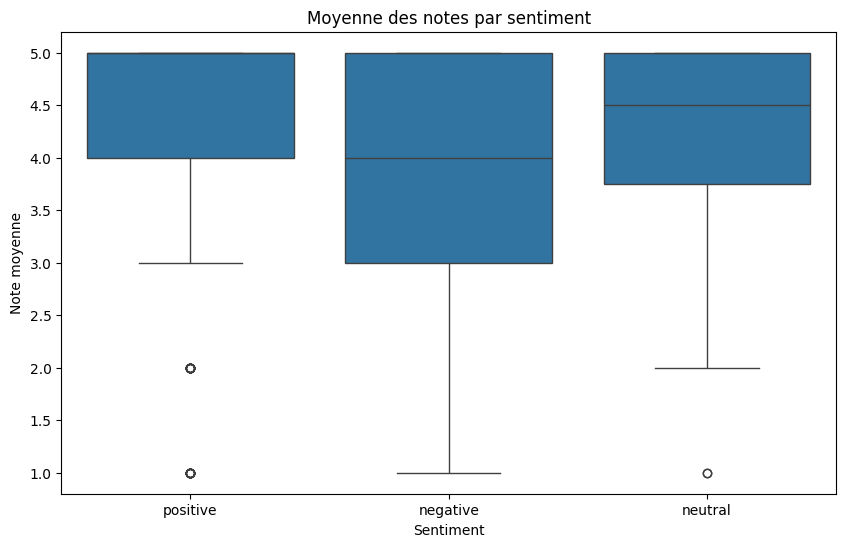

In [85]:
# Création d'un graphique pour visualiser les notes par rapport aux sentiments
plt.figure(figsize=(10, 6))

# Utiliser Seaborn pour créer un diagramme en barres
sns.boxplot(x='sentiment', y='rating', data=review_df)

# Personnaliser le graphique
plt.title('Moyenne des notes par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Note moyenne')

# Afficher le graphique
plt.show()


### Preprocessing 

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re

nltk.download('punkt')
nltk.download('stopwords')

# Définir une liste de stopwords
stop_words = set(stopwords.words('english'))  # Ou 'french' pour les stopwords en français

def preprocess_text(text):
    # Remplacer les contractions courantes
    contractions = {
        "n't": " not",
        "'ve": "",
        "'s": "",
        "'m": " am",
        "'ll": " will",
        "'d": " would",
        "'re": " are",
        "'t": " not"
    }
    for contraction, replacement in contractions.items():
        text = re.sub(contraction, replacement, text.lower())

    # Supprimer les caractères non alphanumériques, sauf les apostrophes
    text = re.sub(r"[^\w\s]", "", text)
    
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Filtrage des stopwords et gestion des négations
    processed_tokens = []
    negation = False
    for i, token in enumerate(tokens):
        if token in stop_words and token not in ['not', 'no']:
            continue
        if negation:
            processed_tokens.append(f"not_{token}")
            negation = False
        elif token in ['not', 'no']:
            negation = True
        else:
            processed_tokens.append(token)
    
    # Création des bigrams pertinents
    bigrams = ["_".join(gram) for gram in ngrams(processed_tokens, 2) if not any(word in gram for word in stop_words)]
    
    # Concaténation des tokens et des bigrams
    return " ".join(processed_tokens + bigrams)

# Appliquer le prétraitement sur le DataFrame
review_df['preprocessed_text'] = review_df['corrected_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
review_df[(review_df['rating'] == 1) | (review_df['rating'] == 2)].size

810

In [110]:
review_df[(review_df['rating'] == 4) | (review_df['rating'] == 5)].size

12200

In [111]:
review_df.size

13930

In [112]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,sentiment,preprocessed_text
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",positive,based menu presented one could write glowing r...
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...,positive,like place feel little bit like tourist trap p...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you...",positive,love french onion soup tried le comptoir de la...
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, his mo...","Came here with my daughter, son inlaw his mom...",negative,came daughter son law mom gratin delicious cam...
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,positive,tiny eatery along seine left bank best burgers...


In [113]:
from collections import Counter
import itertools
from wordcloud import WordCloud

# Combiner tous les textes prétraités en une liste
all_words = list(itertools.chain(*review_df['preprocessed_text'].str.split()))

# Compter la fréquence de chaque mot/n-gram
word_freq = Counter(all_words)

# Sélectionner un certain nombre de mots les plus fréquents
num_words = 100  # par exemple, les 100 mots les plus fréquents
most_common_words = dict(word_freq.most_common(num_words))

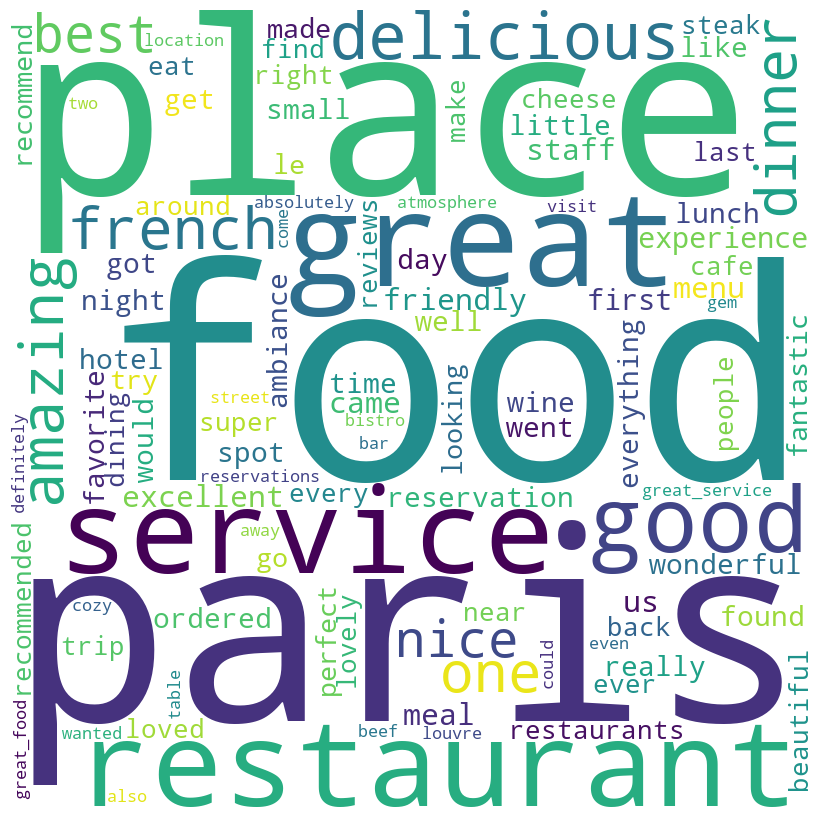

In [114]:
# Création du WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(most_common_words)

# Affichage du WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [128]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize

# Préparation des données pour LDA
# Tokenisation des avis prétraités
texts = [word_tokenize(doc) for doc in review_df['preprocessed_text']]

# Création d'un dictionnaire qui mappe chaque mot à un id unique
dictionary = corpora.Dictionary(texts)

# Filtrage des mots extrêmement rares et trop fréquents pour améliorer la qualité des topics
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Transformation des documents en vecteurs de sac de mots (Bag of Words)
corpus = [dictionary.doc2bow(text) for text in texts]

# Entraînement du modèle LDA
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=6,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Obtenir les topics
topics = lda_model.print_topics(num_words=4)  # Changer le nombre de mots par topic si nécessaire

for topic in topics:
    print(topic)


(0, '0.104*"menu" + 0.072*"like" + 0.068*"night" + 0.060*"found"')
(1, '0.158*"staff" + 0.091*"little" + 0.076*"favorite" + 0.055*"chicken"')
(2, '0.094*"delicious" + 0.078*"service" + 0.075*"amazing" + 0.037*"wine"')
(3, '0.093*"food" + 0.065*"place" + 0.056*"great" + 0.049*"restaurant"')
(4, '0.205*"paris" + 0.098*"one" + 0.083*"dinner" + 0.053*"first"')
(5, '0.048*"us" + 0.045*"came" + 0.038*"get" + 0.033*"ordered"')


In [116]:
pip install pyLDAvis

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/2.6 MB 10.2 MB/s eta 0:00:01
     ----------------- ---------------------- 1.1/2.6 MB 13.9 MB/s eta 0:00:01
     ------------------------------ --------- 2.0/2.6 MB 15.8 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/96.4 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.4 kB ? eta -:--:--
   ---------------------------------------- 96.4/96.4 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Activer pyLDAvis dans Jupyter Notebook (pas nécessaire si vous utilisez JupyterLab ou une autre interface)
pyLDAvis.enable_notebook()

# Préparation des données pour pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Affichage de la visualisation
pyLDAvis.display(lda_display)
